#   导入库

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 11)  #set default figure siz
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import SelectFromModel  
from sklearn.ensemble import RandomForestRegressor  
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

#   训练随机森林模型

In [2]:
def split(xx, yy):          
    zscore = StandardScaler()    
    scaler =MinMaxScaler()      
    
    xx = zscore.fit_transform(xx)       
    yy = scaler.fit_transform(np.reshape(yy.values,(len(yy),1)))   
    x_train, x_test_val, y_train, y_test_val = train_test_split(xx, yy, shuffle=True,test_size=0.3, random_state=1)     
    x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, shuffle=True,test_size=0.25, random_state=1)       
    
    y2 = yy.ravel()         
    ind_train = [np.argwhere(y2 == y_train[i])[0].item() for i in range(len(y_train)) if y_train[i] in y2]
    ind_test = [np.argwhere(y2 == y_test[i])[0].item() for i in range(len(y_test)) if y_test[i] in y2]
    ind_val = [np.argwhere(y2 == y_val[i])[0].item() for i in range(len(y_val)) if y_val[i] in y2]
    
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_val = y_val.ravel()       
    return x_train, x_test,x_val, y_train, y_test,y_val, xx, yy, np.asarray(ind_train), np.asarray(ind_test), np.asarray(ind_val)

# inverse predictive values
def inverse_scaler(y_scaled, y_true):   
    scaler =MinMaxScaler()              
    scaler.fit(np.reshape(yy.values,(len(yy),1)))      
    y_inverse = scaler.inverse_transform(y_scaled.reshape(-1,1))       
    return y_inverse       

# 导入数据

In [3]:
df = pd.read_csv('MP_data_0323_NH4-N.csv', index_col=None, engine='c') 
print('original datasize:', df.shape)
df.dropna(inplace=True)
print('adjusted datasize:', df.shape)
print('data:')
print(df.head())

yy=df.iloc[:,-1]# target - kd
xx= df.iloc[:,0:-1] # predictors
x_train, x_test,x_val, y_train, y_test,y_val, x_scaled, y_scaled, ind_train, ind_test,ind_val = split(xx, yy)

print('target is ', yy.name)
print('predictors are ', xx.columns.tolist())
print('samples size is ', xx.shape[0], '; number of predictors is ', xx.shape[1])
print('training data size is ', x_train.shape[0], '; test data size is ', x_test.shape[0],'; validation data size is ', x_val.shape[0])

original datasize: (222, 17)
adjusted datasize: (222, 17)
data:
   Time  Deep  Length   HRT     COD    TN  NH4-N    C/N    c(A)  CSC  XLogP3  \
0    90  12.5    45.0  72.0  299.46  26.8  24.07  11.17  100.00   11    -0.1   
1    90  45.0    12.5  72.0  299.46  26.8  24.07  11.17  100.00   11    -0.1   
2    84  10.0    30.0  72.0   66.60   3.6   2.35  18.50    0.18   11     0.2   
3    84  10.0    90.0  72.0   66.60   3.6   2.35  18.50    0.18   11     0.2   
4    84  50.0    30.0  72.0   66.60   3.6   2.35  18.50    0.18   11     0.2   

    WI    RA(P)   RA(F)    RA(B)   RA(A)  RR(NH4-N)  
0  885  48.0057  1.8966   9.9499  2.3363     0.6979  
1  885  62.3032  1.6632   6.7403  0.9921     0.6979  
2  943  50.8357  0.9988  10.7969  7.0869     0.7745  
3  943  46.2696  1.4269  11.2249  2.6160     0.7745  
4  943  38.7070  0.6659   6.9918  1.5220     0.7745  
target is  RR(NH4-N)
predictors are  ['Time', 'Deep', 'Length', 'HRT', 'COD', 'TN', 'NH4-N', 'C/N', 'c(A)', 'CSC', 'XLogP3', 'WI', 

# 导入模型

In [4]:
import pickle
# load rf model
path='Models/'
model_name = 'rf.pkl'
with open(path+model_name,'rb') as f:
    rf = pickle.load(f)
    
y_pred_train = rf.predict(x_train)    
y_pred_test = rf.predict(x_test)    
y_pred_val = rf.predict(x_val)  

In [5]:
import pickle
# load gpr model
path='Models/'
model_name = 'GA_SVM.pkl'
with open(path+model_name,'rb') as f:
    ga_svm = pickle.load(f)
    
y_pred_train = ga_svm.predict(x_train)    
y_pred_test = ga_svm.predict(x_test)    
y_pred_val = ga_svm.predict(x_val)  

In [6]:
import pickle
# load gpr model
path='Models/'
model_name = 'gpr.pkl'
with open(path+model_name,'rb') as f:
    gpr = pickle.load(f)
    
y_pred_train = gpr.predict(x_train)    
y_pred_test = gpr.predict(x_test)    
y_pred_val = gpr.predict(x_val) 

In [7]:
import pickle
# load xgboost model
path='Models/'
model_name = 'xgb.pkl'
with open(path+model_name,'rb') as f:
    xgb = pickle.load(f)
    
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)    
y_pred_val = xgb.predict(x_val) 


# FSW-RF

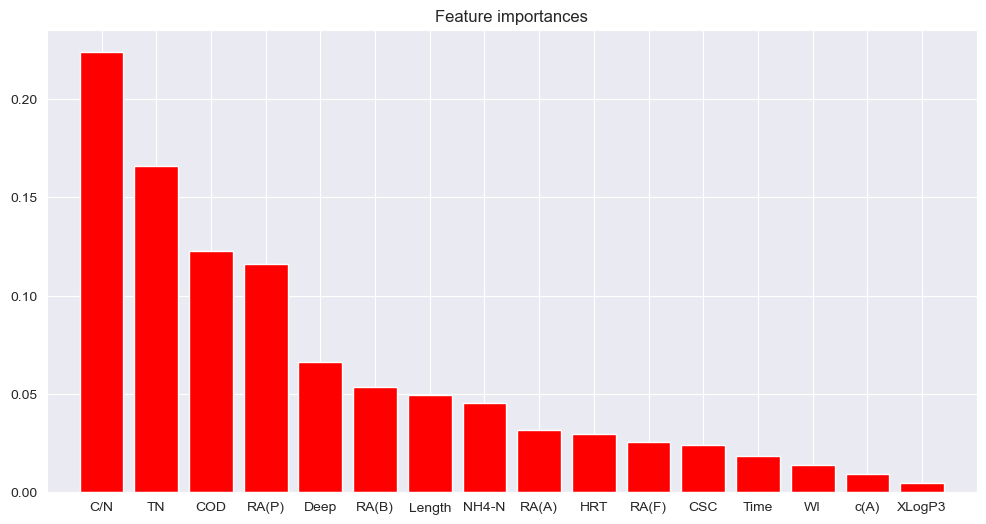

In [8]:
# 获取特征重要性  
importances = rf.feature_importances_  
indices = np.argsort(importances)[::-1]  
  
# 打印特征重要性  
#for f in range(xx.shape[1]):  
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))  
  
# 绘制特征重要性  
plt.figure(figsize=(12, 6))  
plt.title("Feature importances")  
plt.bar(range(xx.shape[1]), importances[indices],  
       color="r", align="center")  
plt.xticks(range(xx.shape[1]), xx.columns[indices], rotation='vertical')  
plt.tick_params(axis='x', rotation=0)
plt.xlim([-1, xx.shape[1]])  
plt.show()  

<Figure size 800x800 with 0 Axes>

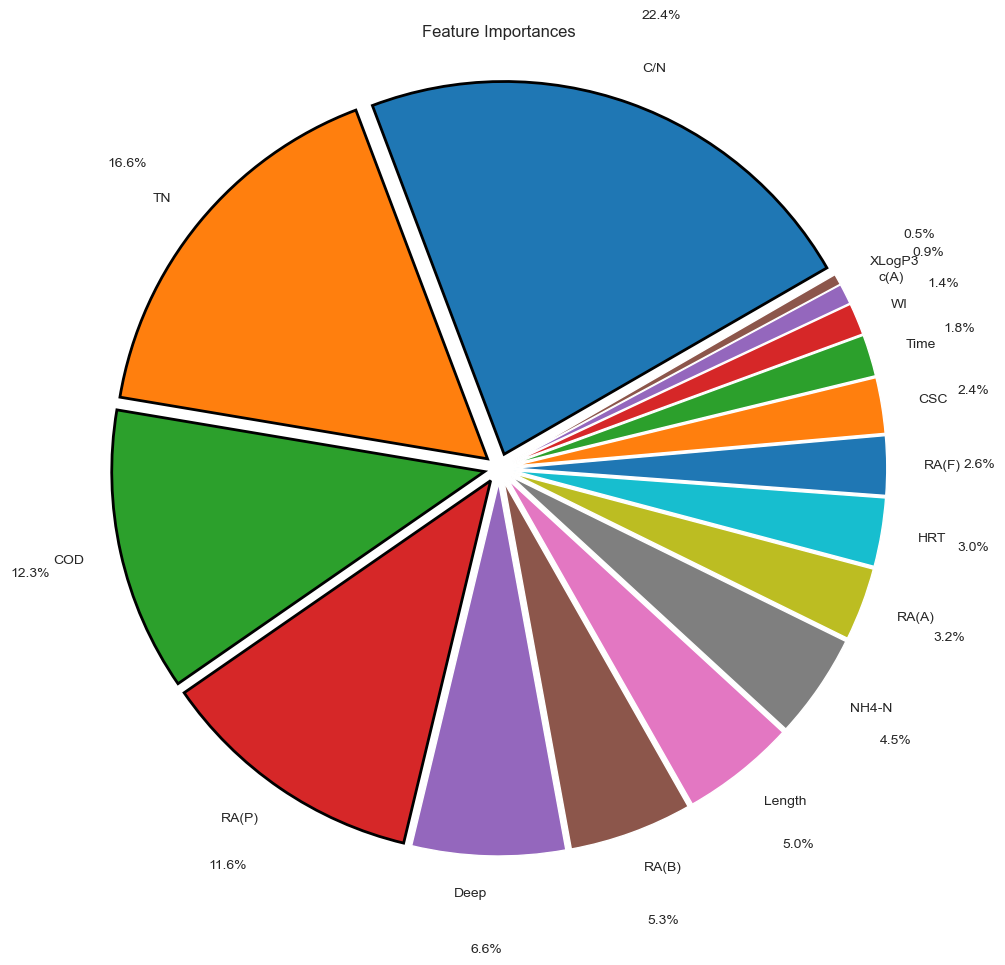

In [9]:
# 使用饼状图展示特征重要性
plt.figure(figsize=(8, 8))

# 需要描边的扇形索引列表  
wedges_to_highlight = [0,1,2,3] 

fig, ax = plt.subplots() 
explode = [0.02] * xx.shape[1]
wedges, texts, autotexts = ax.pie(importances[indices], labels=xx.columns[indices], autopct='%1.1f%%', pctdistance=1.25, labeldistance=1.1, startangle=30, radius=0.5, explode=explode)

# 为特定的扇形设置不同的描边效果  
for i in wedges_to_highlight:  
    wedges[i].set_edgecolor('black')  # 设置描边颜色为红色  
    wedges[i].set_linewidth(2)  # 设置描边宽度为2  
    
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Feature Importances")
plt.show()

#   FSW-XGB

1. feature 6 (0.182088)
2. feature 7 (0.172436)
3. feature 5 (0.092509)
4. feature 4 (0.076491)
5. feature 12 (0.066472)
6. feature 13 (0.058888)
7. feature 1 (0.058736)
8. feature 14 (0.048371)
9. feature 8 (0.046784)
10. feature 15 (0.039404)
11. feature 9 (0.032666)
12. feature 3 (0.031921)
13. feature 2 (0.031316)
14. feature 10 (0.027026)
15. feature 0 (0.024999)
16. feature 11 (0.009894)


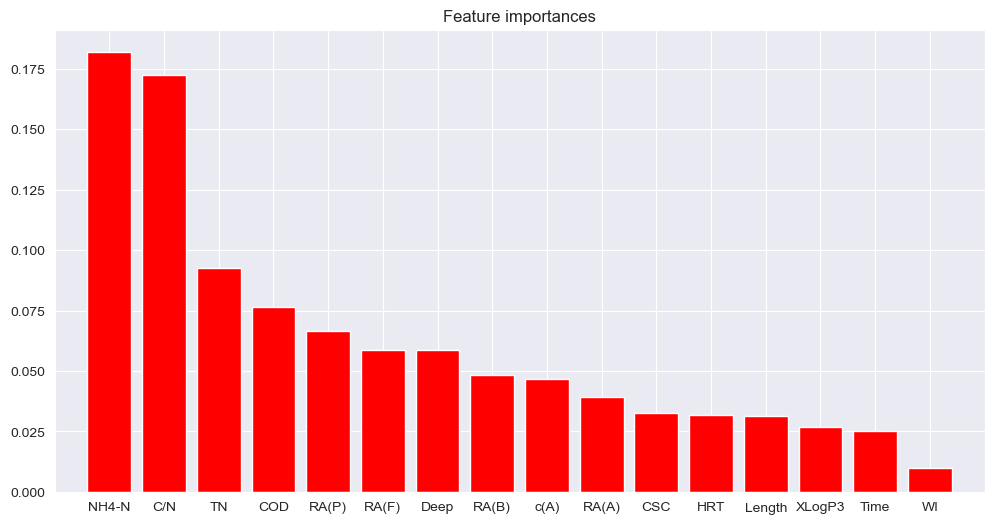

In [10]:
# 获取特征重要性  
importances = xgb.feature_importances_  
indices = np.argsort(importances)[::-1]  
  
# 打印特征重要性  
for f in range(xx.shape[1]):  
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))  
  
# 绘制特征重要性  
plt.figure(figsize=(12, 6))  
plt.title("Feature importances")  
plt.bar(range(xx.shape[1]), importances[indices],  
       color="r", align="center")  
plt.xticks(range(xx.shape[1]), xx.columns[indices], rotation='vertical')  
plt.tick_params(axis='x', rotation=0)
plt.xlim([-1, xx.shape[1]])  
plt.show()  

<Figure size 800x800 with 0 Axes>

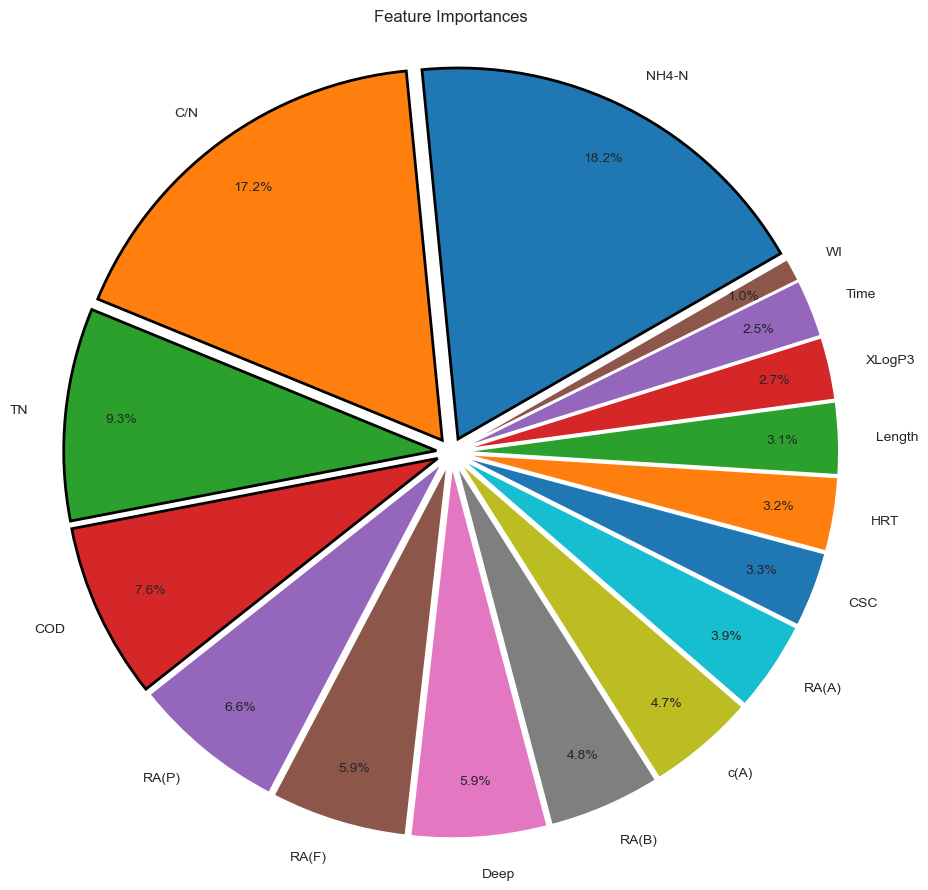

In [11]:
# 使用饼状图展示特征重要性
plt.figure(figsize=(8, 8))

# 需要描边的扇形索引列表  
wedges_to_highlight = [0,1,2,3] 

fig, ax = plt.subplots() 
explode = [0.02] * xx.shape[1]
wedges, texts, autotexts = ax.pie(importances[indices], labels=xx.columns[indices], autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1, startangle=30, radius=0.5, explode=explode)

# 为特定的扇形设置不同的描边效果  
for i in wedges_to_highlight:  
    wedges[i].set_edgecolor('black')  # 设置描边颜色为红色  
    wedges[i].set_linewidth(2)  # 设置描边宽度为2  
    
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Feature Importances")
plt.show()

#   FWS-GPR

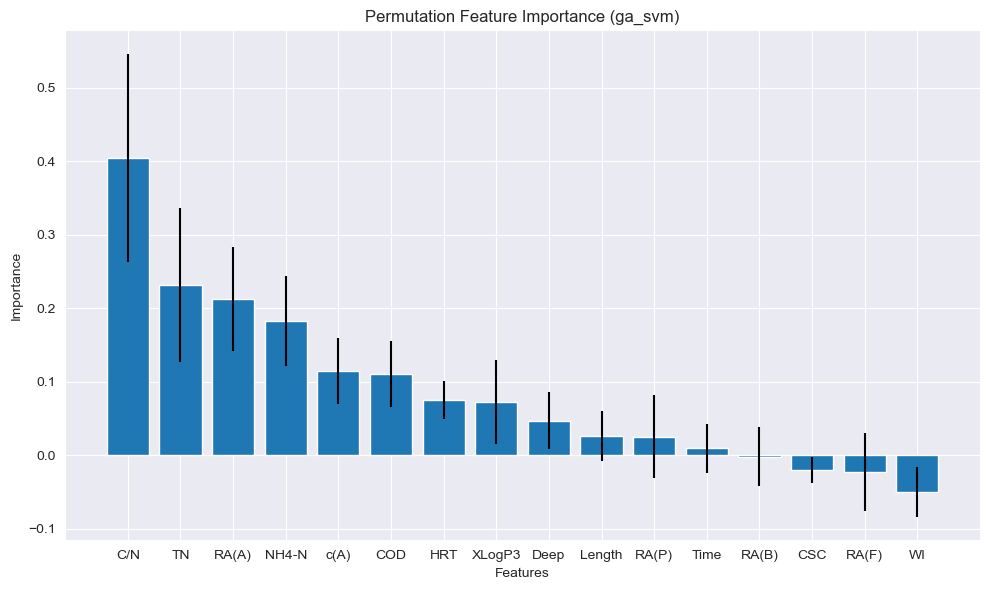

ValueError: Wedge sizes 'x' must be non negative values

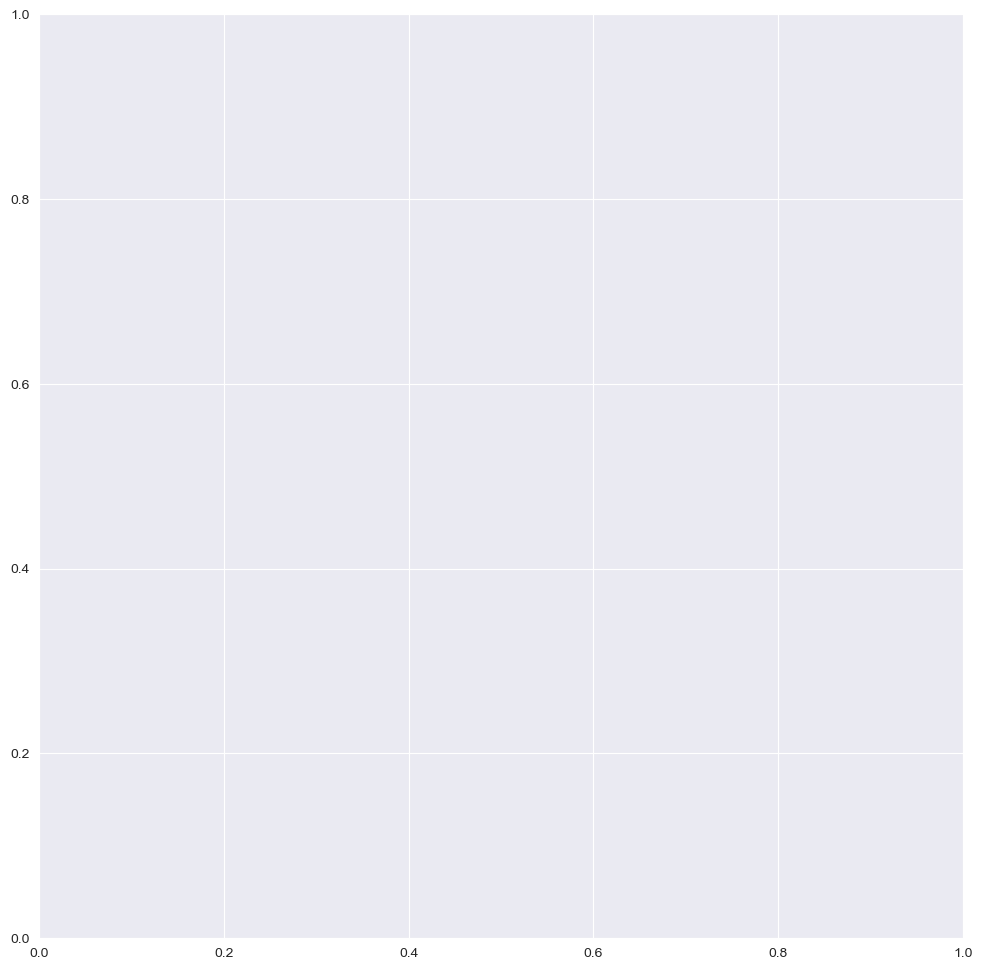

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.inspection import permutation_importance  

result = permutation_importance(ga_svm, x_test, y_test, n_repeats=51,  n_jobs=-1)  
  
# 手动创建特征名称列表  
feature_names = ['Time', 'Deep', 'Length', 'HRT', 'COD', 'TN', 'NH4-N', 'C/N', 'c(A)', 'CSC', 'XLogP3', 'WI', 'RA(P)', 'RA(F)', 'RA(B)', 'RA(A)']  

# 获取特征重要性的均值和标准差  
mean_importance = result.importances_mean  
std_importance = result.importances_std  
  
# 对特征重要性进行排序  
indices = np.argsort(mean_importance)[::-1]  

# 绘制直方图  
plt.figure(figsize=(10, 6))  
plt.bar(range(x_test.shape[1]), mean_importance[indices],  
         yerr=std_importance[indices], align='center')  
plt.xticks(range(x_test.shape[1]), [feature_names[i] for i in indices], rotation='vertical')  # 设置X轴刻度标签  
plt.xlabel('Features')  
plt.ylabel('Importance')  
plt.title('Permutation Feature Importance (ga_svm)')  
plt.tick_params(axis='x', rotation=0) 
plt.tight_layout()  
plt.show()  
  
# 绘制饼图  
plt.figure(figsize=(12, 12))  
plt.pie(mean_importance, labels=feature_names,pctdistance=1.1, labeldistance=1, autopct='%1.1f%%', startangle=90)  
plt.axis('equal')  # 确保饼图是圆的  
plt.title('Permutation Feature Importance Pie Chart (ga_svm)')  
plt.show()

